Nesta competição, temos acesso a dois conjuntos de dados semelhantes que incluem informações de passageiros como nome, idade, sexo, classe socioeconômica, etc. 

Um conjunto de dados é intitulado 'train.csv' e o outro é intitulado "test.csv".

O train.csv possui os detalhes de um subconjunto dos passageiros a bordo (891 para ser exato) e, importante, revelará se sobreviveram ou não.

O conjunto de dados "test.csv" contém informações semelhantes, mas não revela se os passageiros sobreviveram ou não. 

O trabalho será prever se os passageiros sobreviveram ou não.

- **Dicionário de dados**

- **survival** - Se sobreviveu,	0 = Não, 1 = Sim
- **pclass** - Em qual classe estava,	1 = 1º, 2 = 2º, 3 = 3º
- **sex** - sexo	
- **age** -	Idade em anos	
- **sibsp**	- irmãos / cônjuges a bordo do Titanic	
- **parch**	- pais / filhos a bordo do Titanic	
- **ticket** - Número do bilhete	
- **fare** - Tarifa de passageiros	
- **cabin** -	Número da cabine	
- **embarked** - Porto de Embarque

## **Imports**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import plotly.graph_objs as go
import plotly.offline as po
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

## **Importing the data**

In [4]:
url_train ='https://raw.githubusercontent.com/lucxavier/Data_Science_Machine_Learning/master/Competi%C3%A7%C3%B5es%20Kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster/train.csv'
url_test = 'https://raw.githubusercontent.com/lucxavier/Data_Science_Machine_Learning/master/Competi%C3%A7%C3%B5es%20Kaggle/Titanic%20-%20Machine%20Learning%20from%20Disaster/test.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

## **Exploring the data**

In [5]:
#Visualizando as top 5 linhas
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Visualizando as top 5 linhas
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Informações sobre os dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Informações sobre os dados
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
#Número de linhas e colunas
train.shape

(891, 12)

In [10]:
#Número de linhas e colunas
test.shape

(418, 11)

In [11]:
#Resumo dos dados
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
#Resumo dos dados
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## **Limpesa dos dados**

### Dados de Treino

In [13]:
#Retirando algumas colunas
df_train = train.drop(["PassengerId","Cabin","Ticket"],axis=1)

In [14]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
#codificando a coluna Sex
df_train["Sex"] = np.where(df_train["Sex"]=="male",1,0)

#codificando a coluna Embarked
df_train["Embarked"] = df_train["Embarked"].replace({"S":1,"C":2,"Q":3})

### Extraindo os Títulos dos nomes

In [16]:
df_train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [17]:
name=[]
for row in df_train.Name:
    start_index=row.find(", ")
    end_index=row.find(".")
    name.append(row[start_index+1:end_index])

print(name[:10])

[' Mr', ' Mrs', ' Miss', ' Mrs', ' Mr', ' Mr', ' Mr', ' Master', ' Mrs', ' Mrs']


In [18]:
#Colocando os título em novas colunas
df_train['NameTitle'] = pd.Series(name)
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,1.0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,2.0,Mrs
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,1.0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1.0,Mrs
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,1.0,Mr


In [19]:
#Agrupando alguns titulos em uma categoria "outros"
df_train['NameTitle'] = df_train['NameTitle'].replace([' Dr',' Rev',' Mlle', ' Col', ' Major',
                                       ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don'],' Other')

In [20]:
df_train.NameTitle.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Other'], dtype=object)

In [21]:
#codificando a coluna NameTitle
df_train["NameTitle"].replace({" Mr":1," Miss":2," Mrs":3," Master":4," Other":5},inplace=True)

In [22]:
#Removendo a coluna nome
df_train = df_train.drop(["Name"],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,1,22.0,1,0,7.2500,1.0,1
1,1,1,0,38.0,1,0,71.2833,2.0,3
2,1,3,0,26.0,0,0,7.9250,1.0,2
3,1,1,0,35.0,1,0,53.1000,1.0,3
4,0,3,1,35.0,0,0,8.0500,1.0,1


In [23]:
np.set_printoptions(precision=4, suppress=True)

In [24]:
#para a coluna idade, vamos tratar as informações faltantes fazendo um imputer dos dados utiliando a mediana da coluna Age
#para df_train
imputer_train = SimpleImputer(strategy='median')
cols_median_train = imputer_train.fit_transform(df_train[['Age']])

In [25]:
#aplicando as substituições no df_train
df_train[['Age']] = cols_median_train

In [ ]:
#Verificando se ainda temos dados faltantes em Age
df_train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     2
NameTitle    0
dtype: int64

In [26]:
#para a coluna Embarked no df_train, vamos tratar os valores faltantes imputando o valor mais frequante.
imputer = SimpleImputer(strategy='most_frequent')
df_train['Embarked'] = imputer.fit_transform(df_train[['Embarked']])


In [27]:
#ok, não temos mais dados faltantes no df_train
df_train.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Fare         0
Embarked     0
NameTitle    0
dtype: int64

### Dados de Teste

In [28]:
#Retirando algumas colunas
df_test = test.drop(["Cabin","Ticket"],axis=1)

In [29]:
#Codificando as colunas Sex e Embarked
df_test["Sex"] = np.where(df_test["Sex"]=="male",1,0)
df_test["Embarked"] = df_test["Embarked"].replace({"S":1,"C":2,"Q":3})

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1


In [30]:
name=[]
for row in df_test.Name:
    start_index=row.find(", ")
    end_index=row.find(".")
    name.append(row[start_index+1:end_index])

print(name[:10])

[' Mr', ' Mrs', ' Mr', ' Mr', ' Mrs', ' Mr', ' Miss', ' Mr', ' Mrs', ' Mr']


In [31]:
df_test['NameTitle'] = pd.Series(name)

In [32]:
df_test['NameTitle'] = df_test['NameTitle'].replace([' Dr',' Rev',' Mlle', ' Col', ' Major', ' Dona',
                                       ' Sir',' Ms', ' the Countess',' Lady',' Mme', ' Jonkheer',' Capt',' Don'],' Other')

In [33]:
df_test.NameTitle.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Other'], dtype=object)

In [34]:
df_test["NameTitle"].replace({" Mr":1," Miss":2," Mrs":3," Master":4," Other":5},inplace=True)

In [35]:
df_test = df_test.drop(["Name"],axis=1)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,892,3,1,34.5,0,0,7.8292,3,1
1,893,3,0,47.0,1,0,7.0000,1,3
2,894,2,1,62.0,0,0,9.6875,3,1
3,895,3,1,27.0,0,0,8.6625,1,1
4,896,3,0,22.0,1,1,12.2875,1,3


In [36]:
#para a coluna idade, vamos tratar as informações faltantes fazendo um imputer dos dados utiliando a mediana da coluna Age
imputer_test = SimpleImputer(strategy='median')
cols_median_test = imputer_test.fit_transform(df_test[['Age']])

In [37]:
#aplicando as substituições no df_test
df_test[['Age']] = cols_median_test

In [38]:
#Verificando se ainda temos dados faltantes em Age
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
NameTitle      0
dtype: int64

In [39]:
#para a Fare, no df_test vamos tratar as informações faltantes fazendo um imputer dos dados utiliando a mediana da coluna
imputer_test_fare = SimpleImputer(strategy='median')
colFare_median_test= imputer_test_fare.fit_transform(df_test[['Fare']])

In [40]:
#aplicando as substituições no df_test
df_test['Fare'] = colFare_median_test

In [41]:
#ok, não temos mais dados faltantes no df_train
df_test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
NameTitle      0
dtype: int64

In [42]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,892,3,1,34.5,0,0,7.8292,3,1
1,893,3,0,47.0,1,0,7.0000,1,3
2,894,2,1,62.0,0,0,9.6875,3,1
3,895,3,1,27.0,0,0,8.6625,1,1
4,896,3,0,22.0,1,1,12.2875,1,3


## **Análise Exploratória**

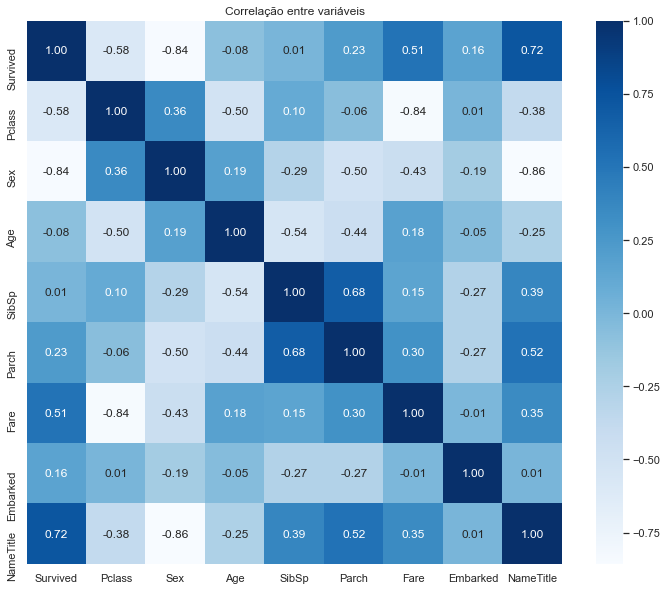

In [45]:
#Criando Matriz de Correlação entra as variáveis
mcorr = df_train.corr()

#Plotando a Matriz de Correlação
plt.figure(figsize=(12, 10))
sns.heatmap(mcorr.corr(),
            annot = True,
            fmt = '.2f',
            cmap='Blues'),
plt.title('Correlação entre variáveis')
plt.show()

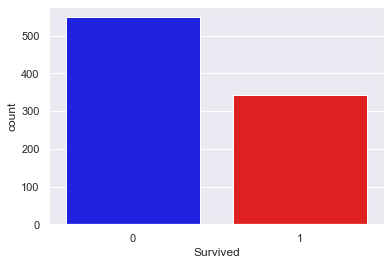

In [46]:
#plotando a quantidade de passageiros que sobreviveram e que não sobreviveram
sns.countplot(data=df_train,x='Survived',palette= ('Blue', 'Red'));

In [47]:
#taxa de sobreviventes por Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [48]:
#taxa de sobreviventes por Sex
df_train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
0,0.742038
1,0.188908


In [ ]:
#taxa de sobreviventes por SibSp
df_train[['SibSp', 'Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [49]:
#taxa de sobreviventes por Parch
df_train[['Parch', 'Survived']].groupby(['Parch']).mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


In [ ]:
#taxa de sobreviventes por Embarked
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
1.0,0.339009
2.0,0.553571
3.0,0.389610


## **Pré-processamento dos dados**

### Dados de Treino

In [50]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0,3,1,22.0,1,0,7.2500,1.0,1
1,1,1,0,38.0,1,0,71.2833,2.0,3
2,1,3,0,26.0,0,0,7.9250,1.0,2
3,1,1,0,35.0,1,0,53.1000,1.0,3
4,0,3,1,35.0,0,0,8.0500,1.0,1


In [51]:
#Dividindo as features e variavel alvo
X_train = df_train.drop(['Survived'],axis=True)
y_train = df_train['Survived']
X_test  = df_test

### Normalização

In [52]:
X_standard = X_train.copy()
X_standard[['Pclass', 'Age', 'SibSp',	'Parch',	'Fare',	'Embarked',	'NameTitle']] = StandardScaler().fit_transform(X_train[['Pclass', 'Age', 'SibSp',	'Parch',	'Fare',	'Embarked',	'NameTitle']])

In [53]:
X_train = X_standard
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,-0.568837,-0.704470
1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845,1.005181,1.197599
2,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,-0.568837,0.246564
3,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,-0.568837,1.197599
4,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,-0.568837,-0.704470


In [54]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,892,3,1,34.5,0,0,7.8292,3,1
1,893,3,0,47.0,1,0,7.0000,1,3
2,894,2,1,62.0,0,0,9.6875,3,1
3,895,3,1,27.0,0,0,8.6625,1,1
4,896,3,0,22.0,1,1,12.2875,1,3


In [55]:
X_standard = X_test.copy()
X_standard[['Pclass', 'Age', 'SibSp',	'Parch',	'Fare',	'Embarked',	'NameTitle']] = StandardScaler().fit_transform(X_test[['Pclass', 'Age', 'SibSp',	'Parch',	'Fare',	'Embarked',	'NameTitle']])

In [56]:
X_standard.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,892,0.873482,1,0.386231,-0.499470,-0.400248,-0.497413,2.243165,-0.736039
1,893,0.873482,0,1.371370,0.616992,-0.400248,-0.512278,-0.677841,1.229867
2,894,-0.315819,1,2.553537,-0.499470,-0.400248,-0.464100,2.243165,-0.736039
3,895,0.873482,1,-0.204852,-0.499470,-0.400248,-0.482475,-0.677841,-0.736039
4,896,0.873482,0,-0.598908,0.616992,0.619896,-0.417492,-0.677841,1.229867


In [57]:
X_test = X_standard

In [58]:
X_test = X_test.drop(["PassengerId"],axis=1)

In [59]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NameTitle
0,0.873482,1,0.386231,-0.499470,-0.400248,-0.497413,2.243165,-0.736039
1,0.873482,0,1.371370,0.616992,-0.400248,-0.512278,-0.677841,1.229867
2,-0.315819,1,2.553537,-0.499470,-0.400248,-0.464100,2.243165,-0.736039
3,0.873482,1,-0.204852,-0.499470,-0.400248,-0.482475,-0.677841,-0.736039
4,0.873482,0,-0.598908,0.616992,0.619896,-0.417492,-0.677841,1.229867


## **MODEL SELECTION**

### - Regressão Logística

In [60]:
#treinando o modelo
log_model = LogisticRegression(random_state=12)
log_model.fit(X_train,y_train)

#fazendo a predição
log_pred = log_model.predict(X_test)

#Verificando a Acurácia do modelo
log_model.score(X_train, y_train)

acc_log = round(log_model.score(X_train, y_train) * 100, 2)


print(round(acc_log,2,), "%")

81.59 %


### - SVC

In [61]:
#Fit the Support Vector Machine Model
svc_model = SVC(random_state=12)
svc_model.fit(X_train,y_train)

#Predict the value for new, unseen data
svc_pred = svc_model.predict(X_test)

#Verificando a Acurácia do modelo
svc_model.score(X_train, y_train)

acc_svc = round(svc_model.score(X_train, y_train) * 100, 2)


print(round(acc_svc,2,), "%")

84.29 %


### - KNN


In [62]:
#treinando o modelo
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=12)
knn_model.fit(X_train, y_train) 
  
#fazendo a predição
knn_pred = knn_model.predict(X_test)

#Verificando a Acurácia do modelo
knn_model.score(X_train, y_train)

acc_knn = round(knn_model.score(X_train, y_train) * 100, 2)


print(round(acc_knn,2,), "%")

85.07 %


### - Árvore de Decisão

In [63]:
#treinando o modelo
tree_model = DecisionTreeClassifier(criterion = "gini", random_state = 12)
tree_model.fit(X_train, y_train) 
  
#fazendo a predição
tree_pred = tree_model.predict(X_test)

#Verificando a Acurácia do modelo
tree_model.score(X_train, y_train)

acc_tree = round(tree_model.score(X_train, y_train) * 100, 2)


print(round(acc_tree,2,), "%")


98.2 %


### - Random Forest

In [76]:
#treinando o modelo
forest_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 12)
forest_model.fit(X_train, y_train) 
  
#fazendo a predição
forest_pred = forest_model.predict(X_test)

#Verificando a Acurácia do modelo
forest_model.score(X_train, y_train)

acc_forest = round(forest_model.score(X_train, y_train) * 100, 2)


print(round(acc_forest,2,), "%")

98.2 %


### - Perceptron

In [77]:
#treinando o modelo
percep_model = Perceptron(max_iter=1000, random_state=12)
percep_model.fit(X_train, y_train)

#fazendo a predição
percep_pred = percep_model.predict(X_test)

#Verificando a Acurácia do modelo
acc_perceptron = round(percep_model.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

65.77 %


### - Gaussian Naive Bayes

In [78]:
#treinando o modelo
gaussian_model = GaussianNB()
gaussian_model.fit(X_train, y_train)

#fazendo a predição
gaussian_pred = gaussian_model.predict(X_test)

#Verificando a Acurácia do modelo
acc_gaussian = round(gaussian_model.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

80.25 %


### - MLP Classifier

In [74]:
MLP_model = MLPClassifier(solver= 'lbfgs', activation='relu', hidden_layer_sizes=(50, 50 ), max_iter= 800, random_state=12)
MLP_model.fit(X_train, y_train)

#fazendo a predição
MLP_pred = MLP_model.predict(X_test)

#Verificando a Acurácia do modelo
acc_MLP = round(MLP_model.score(X_train, y_train) * 100, 2)
print(round(acc_MLP,2,), "%")

95.62 %
C:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [79]:
results = pd.DataFrame({
    'Model': ['Regressão Logistica', 'SVC', 'KNN', 'Árvore de Decisão', 'Random Forest', 'Perceptron', 'Gaussian Naive Bayes', 'MLP Classifier'],
    'Score': [acc_log, acc_svc, acc_knn, acc_tree, acc_forest, acc_perceptron, acc_gaussian, acc_MLP]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
98.20,Árvore de Decisão
98.20,Random Forest
95.62,MLP Classifier
85.07,KNN
84.29,SVC
81.71,Regressão Logistica
80.25,Gaussian Naive Bayes


In [93]:
previsao = pd.DataFrame()
previsao["PassengerId"] = df_test["PassengerId"]
previsao["Survived"] = forest_model.predict(X_test)

In [94]:
previsao.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [95]:
previsao["Survived"].value_counts()

0    273
1    145
Name: Survived, dtype: int64

In [96]:
previsao.to_csv('previsao_mlp.csv',index = False)